In [ ]:
import pandas as pd
import os

os.chdir("../")

In [ ]:
df = pd.read_csv("../data/files/train.csv")
print(df.diagnosis.value_counts())

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64


In [ ]:
files = os.listdir("../data/images/train_images")

<Axes: >

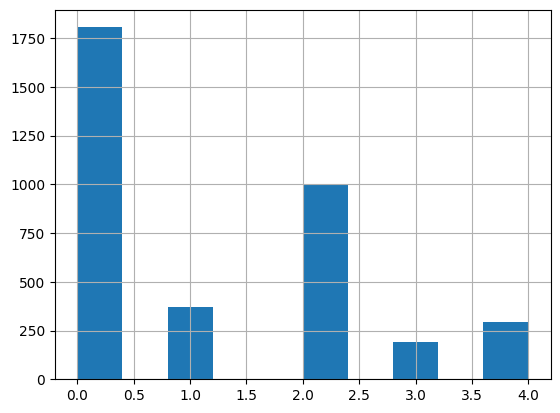

In [ ]:
df.diagnosis.hist()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img_list = []

for i in files[0:20]:
    image = cv2.imread('../data/images/train_images/'+ i) # fotoğrafın okutulması
    newsize = (400,400) # fotoğrafın kırpılması için boyut girişi
    try:
      image = cv2.resize(image,(newsize))
    except:
      print(image)
    img_list.append(image) # fotoğrafın listeye eklenmesi

In [ ]:
type(image)

numpy.ndarray

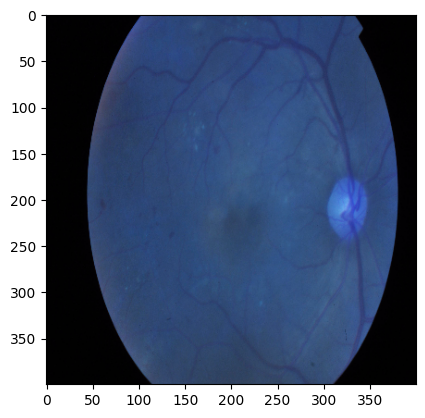

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_list[5]) # mavi geldi çünkü renk kodları farklı RedGrayBlue

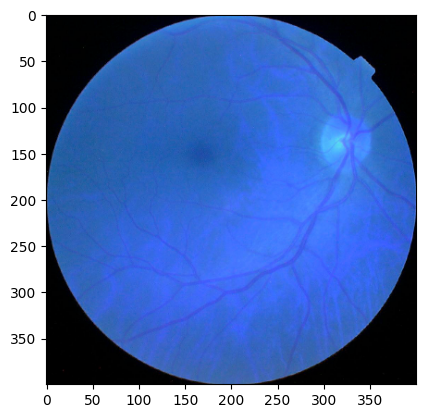

In [ ]:
plt.imshow(img_list[4])

open cv görüntüleri rgb yerine bgr olarak okuyor, bu yüzden renklerde karışıklığa neden oluyor

In [ ]:
img_list = []

for i in files[0:20]:
    image = cv2.imread('../data/images/train_images/'+ i)
    newsize = (400,400)
    image = cv2.resize(image,(newsize))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)

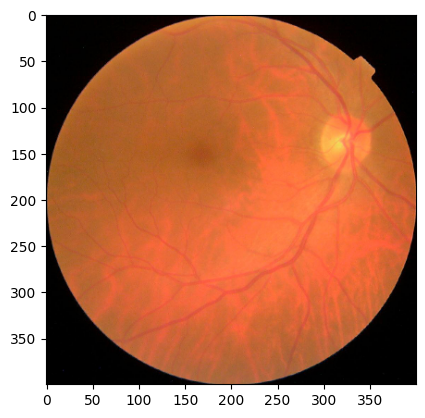

In [ ]:
plt.imshow(img_list[4])

# görüntülerdeki siyah alanların boyutunu eşitlemek

treshold = 0 siyah 255 en parlak

In [ ]:
kopya = img_list[4].copy()

In [ ]:
kopya = cv2.cvtColor(kopya, cv2.COLOR_RGB2GRAY) # fotoğraf renklerinin griye çevrilmesi

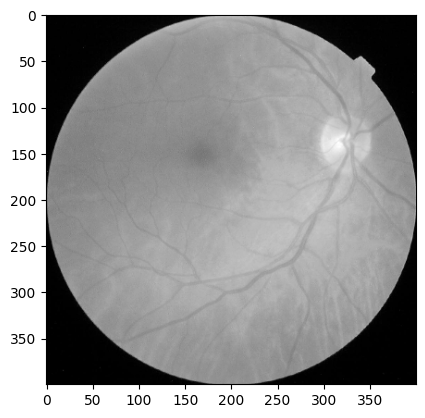

In [ ]:
plt.imshow(kopya, cmap="gray")

In [ ]:
kopya.shape

(400, 400)

bulanıklaştırma işlemi yapmak gereklidir


In [ ]:
blur = cv2.GaussianBlur(kopya, (25,25), 0 )

# 5,5 blurlama yapılmak istenen çekirdek boyutu
# sigmaX = 0 değişikliklerin kaydolması demek
# GaussianBlur(src, ksize, sigmaX)

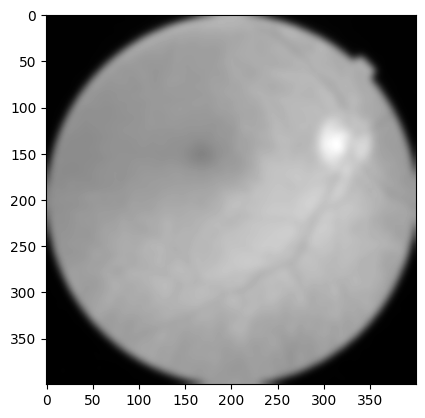

In [ ]:
plt.imshow(blur, cmap="gray")

In [ ]:
blur = cv2.GaussianBlur(kopya, (5,5), 0 )

# 5,5 blurlama yapılmak istenen çekirdek boyutu
# sigmaX = 0 değişikliklerin kaydolması demek
# GaussianBlur(src, ksize, sigmaX)

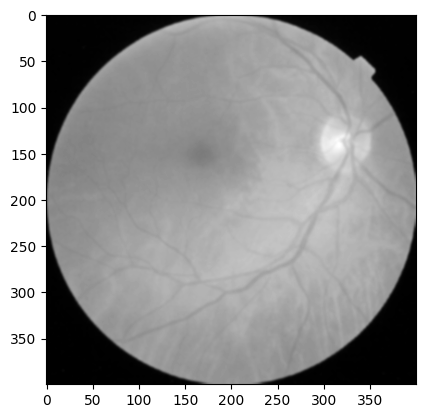

In [ ]:
plt.imshow(blur, cmap="gray")

In [ ]:
tresh = cv2.threshold(blur, 10,255, cv2.THRESH_BINARY)[1]

# 10 ve aşağısındaki tüm değerleri siyah üstündeki değerleri beyaz yapacak
# max değer 255 parlaklık -- resmin ne kadar beyaz olduğu
# bu kod normalde iki kod return eder ama ihtiyacımız olan değer sadece threshold olduğu için 1 dedik

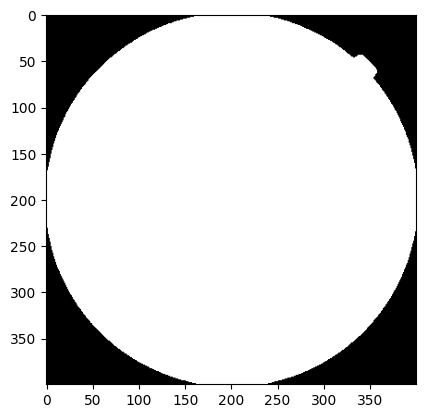

In [ ]:
plt.imshow(tresh, cmap="gray")

görüntüdeki sınırları tespit etme

In [ ]:
kontur = cv2.findContours(tresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours sınır demek
# RETR_EXT.. kenar koordinatları demektir
# SIMPLE direk çerçeve çizer
# bir de NONE var, üçgen dörtgen gibi şekillerin kenar noktalarını koyar

In [ ]:
kontur

((array([[[171,   0]],
  
         [[170,   1]],
  
         [[165,   1]],
  
         ...,
  
         [[236,   1]],
  
         [[232,   1]],
  
         [[231,   0]]], dtype=int32),),
 array([[[-1, -1, -1, -1]]], dtype=int32))

In [ ]:
# en altta da -1 lerden oluşan bir array var sınırlarınn hiyerarşi sırasına denir
# tek katmanlı bir sınır aldığımız için herhangi bir hiyerarşi sırası yok

# bizim de işimize yaramayacağı için sadece koordinatlar yeterli olacak

In [ ]:
kontur = kontur[0][0] # sadece koordinatlar

In [ ]:
kontur.shape

(558, 1, 2)

In [ ]:
# 3 boyutlu olarak dönüş yaptı, hala 1 boyut fazla var 1 değerini atmalıyız

In [ ]:
kontur = kontur[:,0,:]

In [ ]:
kontur.shape # temizlemdi

(558, 2)

siyah alanlardan kurtulmak için sağ sol üst alt koordinatları almamız lazım

In [ ]:
kontur[:,0].argmax()

409

In [ ]:
kontur[308] # sağ tarafı verdi

array([288, 382], dtype=int32)

In [ ]:
kontur[:,0].argmin()

131

In [ ]:
kontur[103] # sol tarafı verdi

array([ 15, 121], dtype=int32)

In [ ]:
sol = tuple (kontur [kontur[:,0].argmin()])
sağ = tuple (kontur [kontur[:,0].argmax()])
üst = tuple (kontur [kontur[:,1].argmin()])
alt = tuple (kontur [kontur[:,1].argmax()])

In [ ]:
sol, sağ, üst, alt

((0, 170), (399, 234), (171, 0), (162, 399))

In [ ]:
x1= sol [0]
y1 = üst [1]
x2 = sağ[0]
y2= alt [1]

In [ ]:
x1, y1, x2, y2


(0, 0, 399, 399)

In [ ]:
orijinal = img_list [4].copy()

# kırpma işlemi yapmak için orjinal görüntnün kopyasını oluşturalım

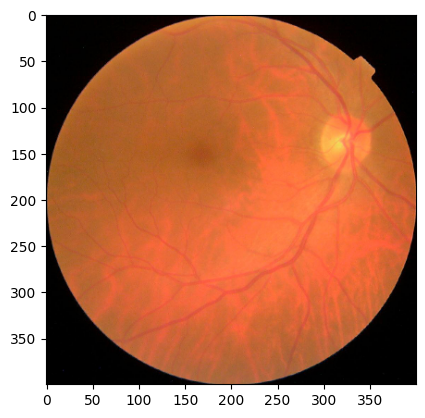

In [ ]:
plt.imshow (orijinal)

In [ ]:
crop_ilk = orijinal [y1:y2, x1:x2]

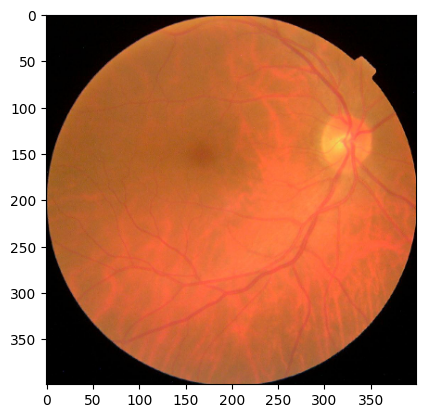

In [ ]:
plt.imshow (crop_ilk)

In [ ]:
crop_ilk = cv2.resize (crop_ilk, (400,400))

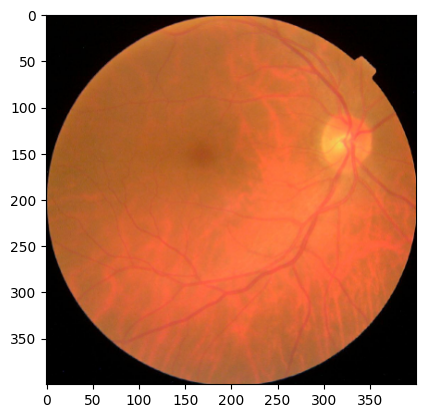

In [ ]:
plt.imshow (crop_ilk)

In [ ]:
x = int(x2-x1) *4//100
y =int(y2-y1)*5//100

In [ ]:
x,y

(15, 19)

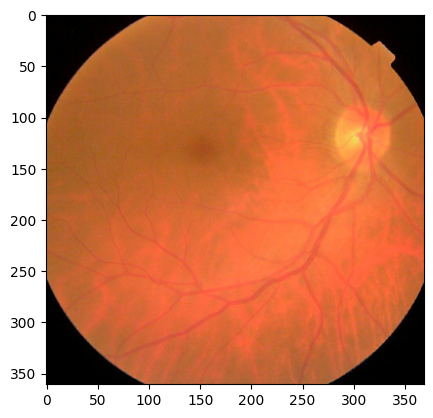

In [ ]:
crop_son = orijinal [y1+y: y2-y, x1+x : x2-x]
plt.imshow (crop_son)

In [ ]:
crop_son = cv2.resize (crop_son, (400,400))

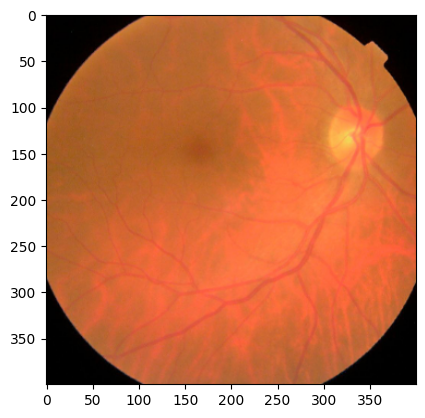

In [ ]:
plt.imshow (crop_son)

# renk ile ilgili ön işlemeler

LAB renk haritası

L light parlaklık
A yeşil kırmızı
B mavi sarı

In [ ]:
lab = cv2.cvtColor (crop_son, cv2.COLOR_RGB2LAB)

In [ ]:
lab.shape

(400, 400, 3)

In [ ]:
l,a,b= cv2.split (lab)

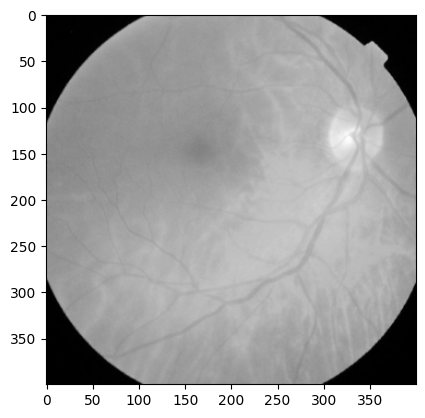

In [ ]:
plt.imshow (l, cmap="gray")

# l içerisinde görüntünün parlaklık değerleri yer alıyor

In [ ]:
clahe = cv2.createCLAHE (clipLimit=7.0,tileGridSize=((8,8)))

# 7 limitinde eğer daha üzerinde bir değer bulursa 8*8 olarak dağılır

In [ ]:
cl = clahe.apply(l)

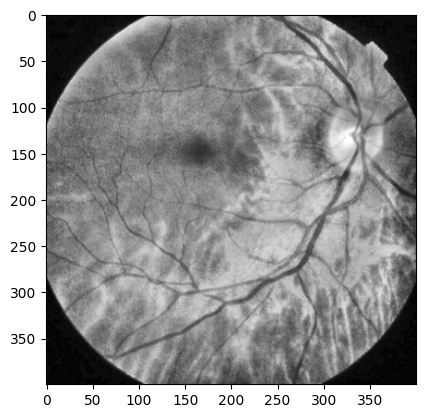

In [ ]:
plt.imshow (cl, cmap="gray")


In [ ]:
limg = cv2.merge ((cl,a,b)) # merge birleştir

In [ ]:
son = cv2.cvtColor (limg, cv2.COLOR_LAB2RGB)

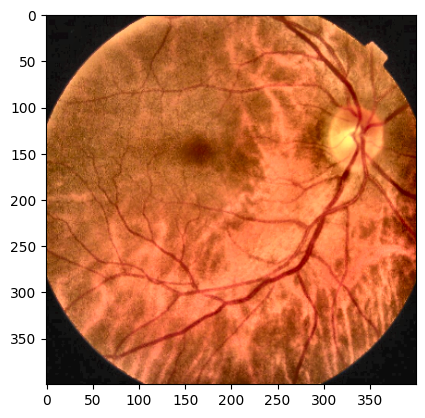

In [ ]:
plt.imshow (son)

görüntü üzerinde bazı kumlanmalar var bunu azaltmak gerek

In [ ]:
med_son = cv2.medianBlur (son, 3)

# sadece tek değer alır, büyüdükçe artar
# kumlanma azalır ama bulanık artar

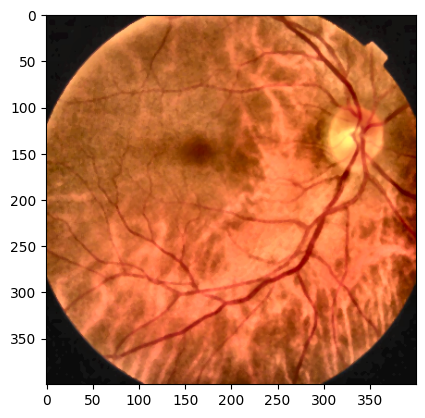

In [ ]:

plt.imshow (med_son)

kanlanmaları da meydana çıkarmak için

In [ ]:
arka_plan = cv2.medianBlur(son,37)

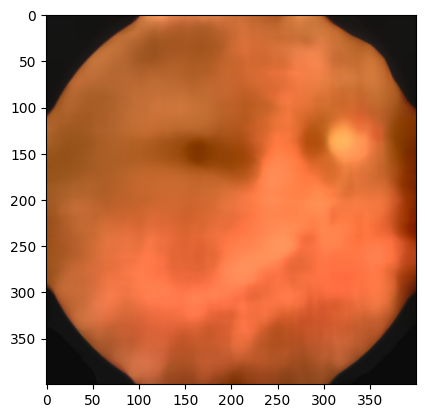

In [ ]:
plt.imshow(arka_plan)

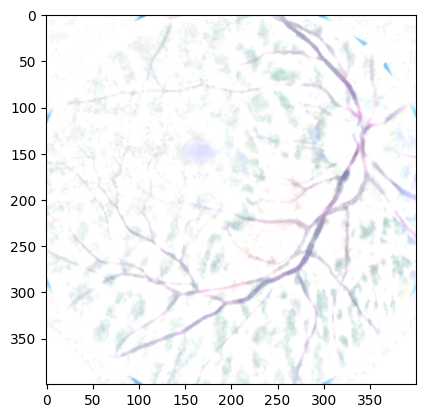

In [ ]:
maske = cv2.addWeighted (med_son, 1, arka_plan, -1,255)
plt.imshow (maske)

In [ ]:
son_img = cv2.bitwise_and(maske, med_son)

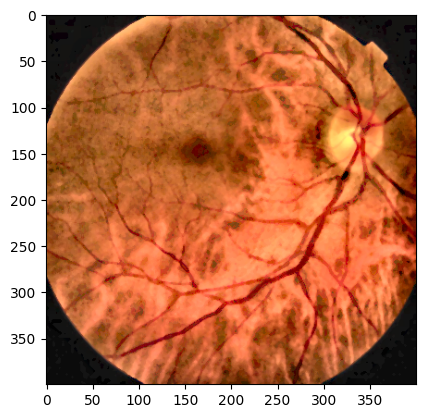

In [ ]:
plt.imshow (son_img)

# ön işleme bitti foksiyon yapalım

In [ ]:
import os
liste = os.listdir('../data/images/train_images/')

In [ ]:
len(liste)

3662

In [ ]:
img_list = []
import cv2
from tqdm import tqdm

for i in tqdm (files):
    #new_path = pa
    image = cv2.imread('../data/images/train_images/'+ i)
    image = cv2.resize(image, (400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    kopya = image.copy()
    kopya = cv2.cvtColor (kopya, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur (kopya, (5,5),0)
    thresh = cv2.threshold (blur, 10,255, cv2.THRESH_BINARY) [1] # 10 ve altında olanlar siyah üstünde olamlar beyaz
    kontur = cv2.findContours (thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # sınırları bul fotoğrafın
    kontur = kontur [0][0]
    kontur = kontur [:,0,:]
    x1 = tuple(kontur [kontur[:,0].argmin()])[0]
    y1 = tuple(kontur [kontur[:,1].argmin()]) [1]
    x2 = tuple(kontur [kontur[:,0].argmax()]) [0]
    y2 = tuple(kontur [kontur[:,1].argmax()]) [1]

    x = int (x2-x1) *4//50
    y = int(y2-y1) *5//50
    kopya2 = image.copy()
    if x2-x1 >100 and y2-y1> 100:
        kopya2 = kopya2 [y1+y: y2-y, x1+x: x2-x]
        kopya2 = cv2.resize(kopya2, (400,400))

    lab = cv2.cvtColor (kopya2, cv2.COLOR_RGB2LAB)
    l, a,b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8))) # parlaklığın azaltılması
    cl = clahe.apply(l)

    limg = cv2.merge((cl,a,b))
    son = cv2.cvtColor (limg, cv2.COLOR_LAB2RGB)
    med_son = cv2.medianBlur (son, 3)
    arka_plan = cv2.medianBlur (son, 37)
    maske = cv2.addWeighted (med_son,1,arka_plan,-1,255)
    son_img = cv2.bitwise_and(maske, med_son)
    img_list.append(son_img)

100%|██████████| 3662/3662 [18:32<00:00,  3.29it/s]


In [ ]:
import numpy as np

np.savez('../data/processed/img_list.npz', img_list)

In [ ]:
len(img_list)

3662

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,12))

for i in range(12):
    img = img_list[i]
    fig.add_subplot(3,4,i+1)
    plt.imshow(img)

plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

# veri seti

In [ ]:
df

id_code  diagnosis
0     000c1434d8d7          2
1     001639a390f0          4
2     0024cdab0c1e          1
3     002c21358ce6          0
4     005b95c28852          0
...            ...        ...
3657  ffa47f6a7bf4          2
3658  ffc04fed30e6          0
3659  ffcf7b45f213          2
3660  ffd97f8cd5aa          0
3661  ffec9a18a3ce          2

[3662 rows x 2 columns]

In [ ]:
df["diagnosis"]

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [ ]:
y_train = pd.get_dummies(df["diagnosis"]).values

In [ ]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
df["diagnosis"][0]

2

In [ ]:
y_train[0]

array([0, 0, 1, 0, 0], dtype=uint8)

In [ ]:
import numpy as np
y_train_son = np.ones(y_train.shape, dtype="uint8")

In [ ]:
y_train_son

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [ ]:
y_train_son[:,4] = y_train[:,4]

In [ ]:
y_train_son

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       ...,
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0]], dtype=uint8)

In [ ]:
for i in range(3,-1,-1):
    y_train_son[:,i] = np.logical_or(y_train[:,i], y_train_son[:,i+1])

In [ ]:
y_train_son

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       ...,
       [1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0]], dtype=uint8)

# train test

In [ ]:
x_train = np.array(img_list)

In [ ]:
x_train.shape

(3662, 400, 400, 3)

In [ ]:
x_train

array([[[[ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        [[ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        [[ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        ...,

        [[ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        [[ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        [[ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]]],


       [[[16, 15, 13],
         [16, 15, 13],
         [16, 

In [ ]:
y_train_son.shape


(3662, 5)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train_son,
                                                  test_size=0.15,
                                                  random_state=2019,
                                                  shuffle=True)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3112, 400, 400, 3), (550, 400, 400, 3), (3112, 5), (550, 5))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [ ]:
data_generator = datagen.flow(x_train, y_train, batch_size=2, seed=2020)

In [ ]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from efficientnet.keras import EfficientNetB5

In [ ]:
örnek_model = EfficientNetB5()

123456840/123456840 [==============================] - 1s 0us/step


In [ ]:
örnek_model.summary()

Model: "efficientnet-b5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 228, 228, 48  1296        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 228, 228, 48  192         ['stem_conv[0][0]']              
                                )                                                   

In [ ]:
örnek_model2 = EfficientNetB5(include_top=False)

115515256/115515256 [==============================] - 1s 0us/step


In [ ]:
örnek_model.summary()

Model: "efficientnet-b5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 228, 228, 48  1296        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 228, 228, 48  192         ['stem_conv[0][0]']              
                                )                                                   

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(EfficientNetB5(weights="imagenet", include_top=False, input_shape = (400,400,3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5,activation = "sigmoid"))






115515256/115515256 [==============================] - 2s 0us/step


In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.00005), metrics=["accuracy"]) # mean absolute error, mean squared error

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr = ReduceLROnPlateau(monitor = "val_los",
                       patience = 3,
                       verbose = 1,
                       mode = "auto",
                       factor=0.25,
                       min_lr=0.000001)

In [ ]:
history = model.fit_generator(data_generator,
                              steps_per_epoch = 1000,
                              epochs = 1,
                              validation_data= (x_val, y_val),
                              callbacks = [lr])

<ipython-input-28-1230c3231457>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator,


In [ ]:
deneme = dict()

In [ ]:
deneme["asd"] = 12

In [ ]:
deneme

{'asd': 12}

In [ ]:
deneme["asd"] = 23

In [ ]:
deneme

{'asd': 23}

In [ ]:
import pandas as pd

# Örnek sözlük
patientName_imgList_diagnosis = {
    'John': {
        'images list': ['image1.jpg', 'image2.jpg'],
        'diagnosis': 'Brain tumor'
    },
    'Sarah': {
        'images list': ['image3.jpg'],
        'diagnosis': 'Migraine'
    },
    'Mike': {
        'images list': ['image4.jpg', 'image5.jpg', 'image6.jpg'],
        'diagnosis': 'Stroke'
    }
}

# Sözlükten veri toplama
data = []
for patient, info in patientName_imgList_diagnosis.items():
    images = info['images list']
    diagnosis = info['diagnosis']
    for image in images:
        data.append({'Patient Name': patient, 'Image Name': image, 'Diagnosis': diagnosis})

# Verileri pandas.DataFrame'e dönüştürme
df = pd.DataFrame(data)

# Veri çıktısı
print(df)


  Patient Name  Image Name    Diagnosis
0         John  image1.jpg  Brain tumor
1         John  image2.jpg  Brain tumor
2        Sarah  image3.jpg     Migraine
3         Mike  image4.jpg       Stroke
4         Mike  image5.jpg       Stroke
5         Mike  image6.jpg       Stroke


In [ ]:
df

Patient Name  Image Name    Diagnosis
0         John  image1.jpg  Brain tumor
1         John  image2.jpg  Brain tumor
2        Sarah  image3.jpg     Migraine
3         Mike  image4.jpg       Stroke
4         Mike  image5.jpg       Stroke
5         Mike  image6.jpg       Stroke